Breakdown by industry

Breakdown by country

Breakdown by Mutual Fund / ETF / individual stock

Breakdown by small / mid / large cap

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [23]:
df = pd.read_csv('holdings.csv')

In [24]:
df

,holding,investment_amt,holding_type,sector,country
0,LCLAX,10000,fund,NaN,NaN
1,MAPTX,10000,fund,NaN,NaN
2,SCHB,10000,fund,NaN,NaN
3,IYK,10000,fund,NaN,NaN
4,SCHA,10000,fund,NaN,NaN
5,SCHM,10000,fund,NaN,NaN
6,AAPL,2000,stock,Technology,US
7,test_stock,2000,stock,Technology,US
8,SPY,10000,fund,NaN,NaN


In [25]:
df['nation'] = df['country'].apply(lambda x: 'Domestic' if x == 'US' else 'International')

In [26]:
df.head(2)

,holding,investment_amt,holding_type,sector,country,nation
0,LCLAX,10000,fund,NaN,NaN,International
1,MAPTX,10000,fund,NaN,NaN,International


In [27]:
df['nation'].value_counts()

International    7
Domestic         2
Name: nation, dtype: int64

Function for Bar graph

In [28]:
def draw_bar_graph(data, labels, title):
    plt.bar(range(len(data)), data, align='center')
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.show()

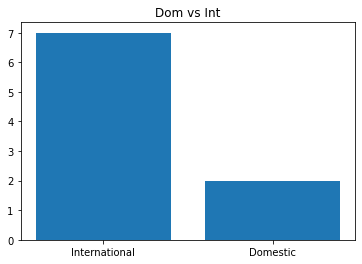

In [29]:
data = df['nation'].value_counts().values
labels = df['nation'].value_counts().keys()
draw_bar_graph(data,labels,"Dom vs Int")

Function for Pie chart

In [30]:
def pie_chart(categories, values, title):
    plt.pie(values, labels=categories)
    
    plt.title(title)
    plt.axis('equal')
    plt.show()

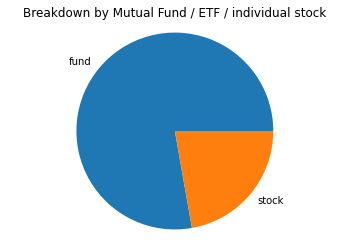

In [31]:
category = df['holding_type'].value_counts().keys()
values = df['holding_type'].value_counts().values
pie_chart(category, values, "Breakdown by Mutual Fund / ETF / individual stock")

Making size columnn

In [32]:
df['cap_size']=""

df.loc[df['investment_amt'] <= 2000, 'cap_size'] = 'small'
df.loc[(df['investment_amt'] > 2000) & (df['investment_amt'] < 6000), 'cap_size'] = 'mid'
df.loc[df['investment_amt'] >= 6000, 'cap_size'] = 'large'

df

,holding,investment_amt,holding_type,sector,country,nation,cap_size
0,LCLAX,10000,fund,NaN,NaN,International,large
1,MAPTX,10000,fund,NaN,NaN,International,large
2,SCHB,10000,fund,NaN,NaN,International,large
3,IYK,10000,fund,NaN,NaN,International,large
4,SCHA,10000,fund,NaN,NaN,International,large
5,SCHM,10000,fund,NaN,NaN,International,large
6,AAPL,2000,stock,Technology,US,Domestic,small
7,test_stock,2000,stock,Technology,US,Domestic,small
8,SPY,10000,fund,NaN,NaN,International,large


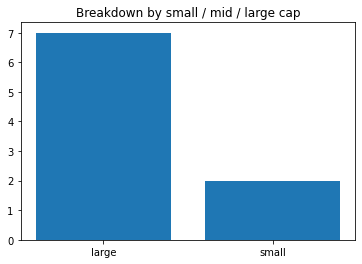

In [33]:
data = df['cap_size'].value_counts().keys()
values = df['cap_size'].value_counts().values
draw_bar_graph(values, data, "Breakdown by small / mid / large cap")

In [34]:
def map_graph(location, value):
  fig = px.choropleth(df, locationmode='country names', locations = location, color = value)
  fig.show()

In [35]:
map_graph(df['country'],df['investment_amt'])